Example: CSTR

Reference: https://reader.elsevier.com/reader/sd/pii/S1474667017313228?token=224BC5B42F541F7B66DCFCA4C355C5DAF8A9484522CE62C7723030A67751FA3B18D80FE8CF0D7ED3551E17EA1BA2D908&originRegion=eu-west-1&originCreation=20210815142702




$$ \begin{array}{ll} q_{f} & 100 \\ C_{f} & 1 \\ T_{f} & 350 \\ T_{c} & 350 \\ E / R & 10000 \\ V & 100 \\ K_{0} & 7.2 \cdot 10^{10} \\ K_{1} & 1.44 \cdot 10^{13} \\ K_{2} & 0.01 \\ K_{3} & 700 \end{array} $$


Mass balance: $$ \frac{d T}{d t}= \frac{q_{f}}{V}\left(T_{f}-T\right)+K_{1} C e^{-\frac{E}{RT}} +K_{2} q_{c}\left(1-e^{-\frac{K_{3}}{q_c}}\right)\left(T_{c}-T\right) $$ Energy balance: $$ \frac{d C}{d t}=\frac{q_{f}}{V}\left(C_{f}-C\right)-K_{0} C e^{-\frac{E}{R T}} $$

In [7]:
import numpy as np
from DRO_class import Opt_problem, Simulation
import casadi as ca
import mosek
import cvxpy as cp


def CSTR_nonlinear_ode(x, u):
    qf = 100
    Cf = 1
    Tf = 350
    Tc = 350
    E_R = 10000
    V = 100
    K0 = 7.2e10
    K1 = 1.44e13
    K2 = 0.01
    K3 = 700

    dx1_dt = qf / V * (Tf - x[0]) + K1 * x[1] * ca.exp(-E_R / x[0]) + K2 * u[0] * (1 - ca.exp(-K3 / u[0])) * (Tc - x[0])
    dx2_dt = qf / V * (Cf - x[1]) - K0 * x[1] * ca.exp(-E_R / x[0])
    rhs = [dx1_dt,
           dx2_dt
           ]

    return ca.vertcat(*rhs)

if __name__ == "__main__":
    x_SX = ca.SX.sym("x_SX", 2)
    u_SX = ca.SX.sym("u_SX", 1)

    ode = ca.Function("ode_func", [x_SX, u_SX], [CSTR_nonlinear_ode(x_SX, u_SX)])
    delta_t = 0.1

    C = np.array([[6e-2, 0], [0, 0]])
    # C = np.array([[0,0], [0, 0]])
    D = np.array([[1, 0]])
    E = np.array([[0, 1e-3]])
    # E = np.array([[0,0]])
    N = 5

    delta_t = 0.1

    x_init = np.array([[432.94], [0.1298]])
    u_0 = np.array([[110]])

    xr = np.array([[437.25],[0.1062]])
    ur = np.array([[105]])

    Q = np.diag([10, 1])
    R = np.array([[1]])
    Qf = np.diag([15, 1])

    mu = np.zeros([2, 1])
    sigma = 1
    sin_const = 1
    mass_sim = Simulation(ode, delta_t, N, x_init, C, D, E, Q, Qf, R, cont_time=True, nonlinear=True, u_0=u_0,
                          xr=xr, ur=ur, collect=False, est=False, mu=mu, sigma=sigma, beta=1,
                          sin_const=sin_const, N_sample=1, epsilon=0.1, i_th_state=0, i_state_ub=437.5, N_sim=60,
                          mode="gene", data_set=None, N_sample_max=None)

    mass_sim.plot_state()

SolverError: Solver 'MOSEK' failed. Try another solver, or solve with verbose=True for more information.

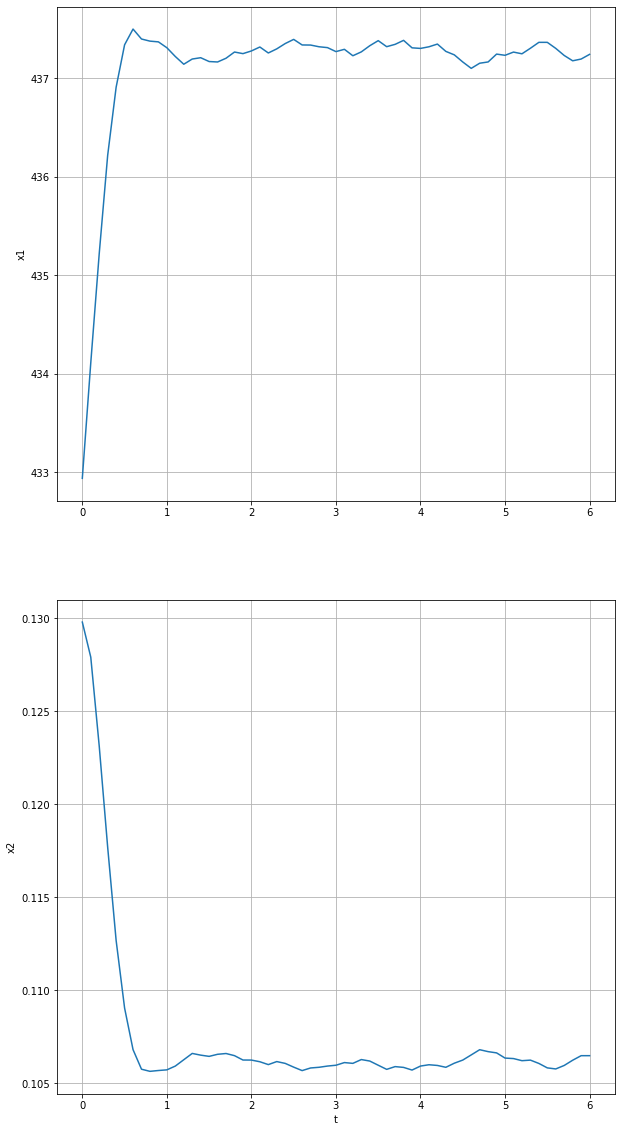

In [6]:
import numpy as np
from DRO_class import Opt_problem, Simulation
import casadi as ca
import mosek
import cvxpy as cp


def CSTR_nonlinear_ode(x, u):
    qf = 100
    Cf = 1
    Tf = 350
    Tc = 350
    E_R = 10000
    V = 100
    K0 = 7.2e10
    K1 = 1.44e13
    K2 = 0.01
    K3 = 700

    dx1_dt = qf / V * (Tf - x[0]) + K1 * x[1] * ca.exp(-E_R / x[0]) + K2 * u[0] * (1 - ca.exp(-K3 / u[0])) * (Tc - x[0])
    dx2_dt = qf / V * (Cf - x[1]) - K0 * x[1] * ca.exp(-E_R / x[0])
    rhs = [dx1_dt,
           dx2_dt
           ]

    return ca.vertcat(*rhs)

if __name__ == "__main__":
    x_SX = ca.SX.sym("x_SX", 2)
    u_SX = ca.SX.sym("u_SX", 1)

    ode = ca.Function("ode_func", [x_SX, u_SX], [CSTR_nonlinear_ode(x_SX, u_SX)])
    delta_t = 0.1

    C = np.array([[6e-2, 0], [0, 0]])
    # C = np.array([[0,0], [0, 0]])
    D = np.array([[1, 0]])
    E = np.array([[0, 1e-3]])
    # E = np.array([[0,0]])
    N = 5

    delta_t = 0.1

    x_init = np.array([[432.94], [0.1298]])
    u_0 = np.array([[110]])

    xr = np.array([[437.25],[0.1062]])
    ur = np.array([[105]])

    Q = np.diag([10, 1])
    R = np.array([[1]])
    Qf = np.diag([15, 1])

    mu = np.zeros([2, 1])
    sigma = 1
    sin_const = 1
    mass_sim = Simulation(ode, delta_t, N, x_init, C, D, E, Q, Qf, R, cont_time=True, nonlinear=True, u_0=u_0,
                          xr=xr, ur=ur, collect=False, est=False, mu=mu, sigma=sigma, beta=1,
                          sin_const=sin_const, N_sample=1, epsilon=10, i_th_state=0, i_state_ub=437.5, N_sim=60,
                          mode="gene", data_set=None, N_sample_max=None)

    mass_sim.plot_state()


